In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
from sklearn import linear_model



%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Q:

1. Verilerinizi eğitim ve test kümelerine ayırın.

2. Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

3.Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.

4.Modelinizin performansı tatmin edici mi? Açıklayın.

5.Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [6]:
prices = pd.read_csv('data_house_prices.csv')
prices.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [7]:
high=prices.corr().SalePrice.abs().sort_values(ascending=False).index[0:11]
high

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [11]:
#Model
Y = prices['SalePrice']
X = prices[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [10]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     390.9
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:30:14   Log-Likelihood:                -13950.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1157   BIC:                         2.798e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.105e+06   1.44e+05     -7.671      0.000   -1.39e+06   -8.22e+05
OverallQual   1.984e+04   1340.584     14.797      0.000    1.72e+04    2.25e+04
GrLivArea       45.0594      4.706      9.575      0.000      35.826      54.293
GarageCars    1.189e+04   3450.974      3.445      0.001    5118.729    1.87e+04
GarageArea      17.1388     11.590      1.479      0.139      -5.601      39.878
TotalBsmtSF     13.7012      4.649      2.947      0.003       4.580      22.822
1stFlrSF        14.2736      5.357      2.665      0.008       3.764      24.783
FullBath     -4869.7054   2968.844     -1.640      0.101   -1.07e+04     955.215
TotRmsAbvGrd  1643.7793   1250.209      1.315      0.189    -809.151    4096.710
YearBuilt      275.8121     55.419      4.977      0.000     167.079     384.545
YearRemodAdd   246.0751     70.866      3.472      0.001     107.035     385.115
==============================================================================
Omnibus:                      395.722   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39733.113
Skew:                          -0.537   Prob(JB):                         0.00
Kurtosis:                      31.553   Cond. No.                     4.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eğitilmiş modelimizin R squared adj R squared değerlerine baktığımızda anlamlı bir model oluştuğunu söyleyebiliriz.

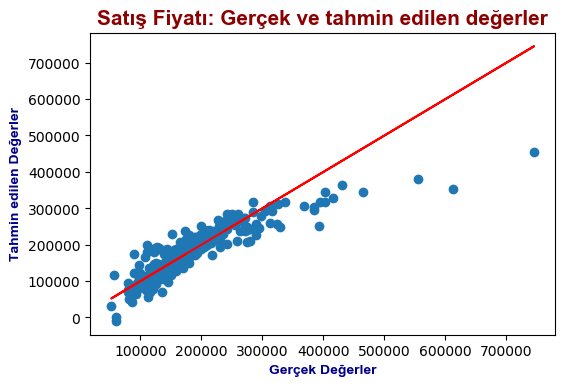

Ortalama Mutlak Hata (MAE)        : 26093.135377629093
Ortalama Kare Hata (MSE)          : 1649869554.0156603
Kök Ortalama Kare Hata (RMSE)     : 40618.58631237257
Ortalama Mutlak Yüzde Hata (MAPE) : 15.166068176962778


In [13]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Satış Fiyatı: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Grafikte, modelimizin hedefin daha düşük değerlerini daha yüksek değerlerden daha iyi tahmin ettiğini görüyoruz. Görselleştirmeler kullanmak, modellerin performansını anlamamıza yardımcı olur. Ancak, modellerimizi değerlendirmek için daha doğru yollar bulmamız gerekiyor. Modelimiz yeterli gözüksede biraz daha iyileştirme yapabiliriz garage ile ilişkili değerlerin etkileşimini alabiliriz.

In [16]:
Y = prices['SalePrice']
prices['Garage']=prices['GarageCars']*prices['GarageArea']
X = prices[['OverallQual', 'GrLivArea', 'Garage','GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd']]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [18]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     416.4
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:39:27   Log-Likelihood:                -13922.
No. Observations:                1168   AIC:                         2.787e+04
Df Residuals:                    1157   BIC:                         2.792e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.061e+06    1.4e+05     -7.584      0.000   -1.34e+06   -7.86e+05
OverallQual   1.941e+04   1308.146     14.840      0.000    1.68e+04     2.2e+04
GrLivArea       47.2665      3.367     14.037      0.000      40.660      53.873
Garage          38.5009      4.964      7.756      0.000      28.762      48.240
GarageCars    1163.0699   3648.214      0.319      0.750   -5994.785    8320.925
GarageArea     -65.9228     15.440     -4.270      0.000     -96.217     -35.629
TotalBsmtSF     10.2285      4.539      2.253      0.024       1.323      19.134
1stFlrSF        15.1229      5.227      2.893      0.004       4.867      25.379
FullBath     -4736.7003   2877.797     -1.646      0.100   -1.04e+04     909.586
YearBuilt      301.5989     54.092      5.576      0.000     195.469     407.729
YearRemodAdd   215.0477     69.227      3.106      0.002      79.223     350.873
==============================================================================
Omnibus:                      410.540   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35491.073
Skew:                          -0.660   Prob(JB):                         0.00
Kurtosis:                      29.973   Cond. No.                     4.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

garage değişkeninden sonra biraz daha anlamlı metrikler elde ettik.

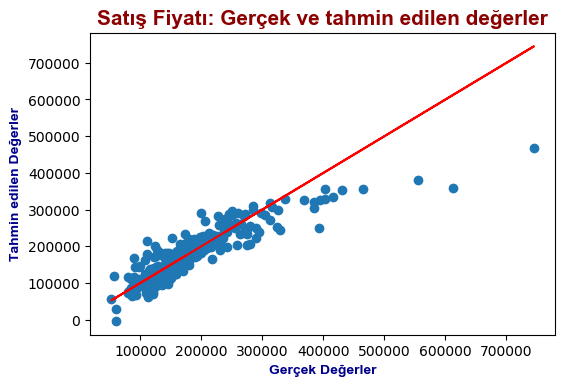

Ortalama Mutlak Hata (MAE)        : 25498.49336240507
Ortalama Kare Hata (MSE)          : 1595559160.7631319
Kök Ortalama Kare Hata (RMSE)     : 39944.45093831097
Ortalama Mutlak Yüzde Hata (MAPE) : 14.560333498615458


In [21]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Satış Fiyatı: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


MAE MSE RMSE MAPE değerlerinin daha küçüldüğünü r squared ve adj r squared değerinin arttığını görebiliyoruz. Ayrıca düşük değerlerde dahada anlamlı donuçlar elde ettik.